# TelCom Solutions Churn Crisis

### Juliana Afini - 67627 TXC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import textwrap

In [2]:
df = pd.read_csv("2767ML_assignment1_data.csv")

## Question 1

### Q1.1 

In [3]:
total_churned = df[df["Churn"] == True].shape[0]

churned_with_intl_plan = df[(df["Churn"] == True) & (df["International plan"] == "Yes")].shape[0]

churn_percentage = (churned_with_intl_plan / total_churned) * 100

ceo_statement_correct = churn_percentage == 15

print(f"Is the CEO's statement correct? {'Yes' if ceo_statement_correct else 'No'}")
print(f"Actual churn percentage from International Plan users: {churn_percentage:.2f}%")


Is the CEO's statement correct? No
Actual churn percentage from International Plan users: 27.59%


### Q1.2 

Answer in the code from Section 2.

#### i. Customer service calls are a strong indicator of churn
- The analysis showed that customers who churn make significantly more customer service calls compared to those who stay.
- While most customers (churned and non-churned) make 0 to 2 calls, the proportion of churners increases significantly for those making 3 or more calls, suggesting that frequent customer service interactions may be linked to dissatisfaction leading to churn.

#### ii. The International plan does not provide significant cost savings
- Customers with an International Plan tend to have higher international charges overall because of its higher usage, but churned customers show an even stronger presence in the upper charge range. This suggests that higher international usage might be linked to dissatisfaction, potentially due to pricing or billing concerns. 
- The median international charge per minute is almost the same (~0.27) for customers with and without an International Plan, making the plan less attractive. 

#### iii. Higher day charges are more strongly linked to churn than other charge types
- The analysis of day, evening, and night charges showed that churned customers are more likely to have higher day charges.
- In contrast, evening and night charges had similar distributions for churned and non-churned users, suggesting they are less relevant to churn behavior.

## Question 2

### Q2.1 

The Telecom company is facing a classification problem because the objective is to predict whether a customer will churn or not, which is a binary outcome (Yes/No or 1/0). In machine learning, classification models are used when the target variable consists of distinct categories rather than continuous values. Since the goal is to identify customers at risk of churning, models such as Logistic Regression, Decision Trees, Random Forest, and XGBoost are commonly used for this type of predictive task.

Other machine learning approaches, such as regression, would not be suitable here because they are used for predicting continuous numerical values, like customer lifetime value. Similarly, recommendation systems focus on suggesting products or services, which is not relevant to churn prediction. Foundational models, which are typically large pre-trained AI models for general tasks like NLP or vision, are unnecessary for this problem. Therefore, the most appropriate machine learning approach for this problem is classification.

### Q2.2

Answer in the code from Section 3.

For this churn prediction, I selected Random Forest and XGBoost due to their strong performance in handling structured data and their ability to capture complex decision boundaries. Random Forest is particularly effective in churn-related data because it reduces overfitting by averaging multiple decision trees, making it robust to noise and fluctuations in customer behavior. This is crucial as churn is often influenced by multiple factors such as service usage, billing, and customer support interactions. XGBoost, on the other hand, sequentially improves its predictions by correcting previous errors, making it highly effective in distinguishing between churners and non-churners, especially in datasets where certain customer behaviors strongly indicate churn but may not be linearly separable.

To maximize predictive performance, I applied hyperparameter tuning using GridSearchCV. Random Forest was tuned to balance depth and the number of trees to generalize well across different customer profiles, while XGBoost was optimized for learning rate and boosting iterations to enhance its ability to detect churn indicators. These models were chosen because churn prediction often involves non-linear relationships between features, such as customer service call frequency or international plan usage. By prioritizing Accuracy, F1-score and AUC-ROC, I ensured that the models effectively capture both false positives and false negatives, which is crucial for designing targeted customer retention strategies.

## Question 3

### Q3.1

Answer in the code from Section 3.

For evaluating the performance of the churn prediction models, I prioritized metrics that provide insights into both overall accuracy and the model's ability to correctly classify churners versus non-churners. Since churn is typically an imbalanced classification problem, standard accuracy alone is insufficient, as a model predicting the majority class (non-churners) most of the time may still achieve high accuracy while failing to identify churners. To address this, I used the following key metrics:
- AUC-ROC (Area Under the Receiver Operating Characteristic Curve): This metric evaluates the model's ability to discriminate between churners and non-churners across different threshold values. A higher AUC-ROC indicates better classification performance, making it particularly useful when business decisions depend on ranking customers by churn risk.
- F1-Score: Since churn prediction involves trade-offs between false positives (incorrectly predicting a customer will churn) and false negatives (failing to identify a real churner), the F1-score balances precision and recall. This ensures that the model is not biased toward just one of these aspects, helping avoid excessive false alarms or missed churners.
- Accuracy: While not the primary metric, accuracy provides a general sense of how well the model performs overall. However, given potential class imbalance, accuracy must be interpreted alongside AUC-ROC and F1-score.

### Q3.2

Answer in the code from Section 3.

Based on the evaluation metrics, XGBoost emerges as the best model for predicting churn, with the highest accuracy (0.96) and AUC-ROC (0.90). The F1-score (0.82) further supports its strong performance, especially in churn prediction, as it balances precision and recall, ensuring that more churned customers are correctly identified while minimizing false positives. This makes XGBoost particularly effective in scenarios where failing to identify a churner is more costly than mistakenly flagging a non-churner.

While Random Forest achieved a high AUC-ROC (0.91) and an accuracy of 0.93, its lower F1-score (0.71) indicates that it does not handle class imbalance as effectively as XGBoost. AUC-ROC measures ranking ability, but the F1-score is crucial when false negatives are costly, as it reflects the model's ability to correctly identify churned customers. Thus, XGBoost’s superior F1-score and AUC-ROC make it the optimal choice for churn prediction in this case.

## Question 4

Answer in the code from Section 4.

## Question 5

### Q5.1

Based on both the exploratory data analysis (EDA) and the feature importance from the XGBoost model (Section 5 of the code), the key customer characteristics that most strongly influence churn are:
- High Total Day and Evening Charges: Customers with higher total day and evening charges are more likely to churn. This suggests that heavy usage during peak hours may lead to higher costs, potentially causing dissatisfaction and increased churn risk.
- Frequent Customer Service Calls: Customers who make more customer service calls show a higher likelihood of churning. This indicates that dissatisfaction with service—potentially due to unresolved issues or poor customer support experiences—contributes to customer attrition.
- Higher Total International and Night Charges: While not as significant as day and evening charges, total international and night charges also contribute to churn. This further reinforces the idea that customers with high billing amounts, especially for additional services, may be more prone to leaving.
- International Plan Subscription: Customers with an international plan tend to have higher international charges, and those who churn are more likely to fall in the upper range of international charges. This suggests that higher international usage and associated costs might be a factor in dissatisfaction.

### Q5.2

#### 1. Implement a new customer support strategy: 
Since frequent customer service interactions are strongly linked to churn, the company should improve its support experience. This can be achieved by:
- Enhancing first-call resolution: Ensure that customer complaints and inquiries are resolved efficiently in the first interaction to reduce frustration.
- Using predictive analytics: Identify at-risk customers based on service call frequency and proactively reach out with personalized support or incentives.
- Training support staff: Improve agent training to handle issues effectively, reducing the need for repeated calls and increasing customer satisfaction.

#### 2. Optimize pricing and plan offerings to reduce cost-related churn: 
High total day and evening charges, along with dissatisfaction from customers with international plans, indicate that cost concerns are a major factor in churn. The company can address this by:
- Introducing flexible and personalized pricing: Offer customized plans based on usage patterns to better match customers' needs and reduce billing shocks.
- Loyalty-based discounts: Provide discounts or exclusive perks for long-term customers, especially those with high charges, to improve retention.
- Revising the International Plan: Given that churned customers with an international plan tend to have higher international charges, the company should reevaluate pricing and offer more competitive rates, bundles, or incentives for frequent international callers.
- Usage alerts and cost control tools: Notify customers when they are approaching high usage thresholds and offer proactive solutions such as temporary plan upgrades or alternative pricing structures.

#########################################################################################################################

# Full code


## Section 1: Prepare data for analysis

In [4]:
# Total number of records
print("Total number of records in the dataset:", df.shape)

Total number of records in the dataset: (2999, 20)


In [5]:
# What are the features available and what are their data type?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2999 non-null   object 
 1   Account length          2999 non-null   int64  
 2   Area code               2999 non-null   int64  
 3   International plan      2999 non-null   object 
 4   Voice mail plan         2999 non-null   object 
 5   Number vmail messages   2999 non-null   int64  
 6   Total day minutes       2999 non-null   float64
 7   Total day calls         2999 non-null   int64  
 8   Total day charge        2999 non-null   float64
 9   Total eve minutes       2999 non-null   float64
 10  Total eve calls         2999 non-null   int64  
 11  Total eve charge        2999 non-null   float64
 12  Total night minutes     2999 non-null   float64
 13  Total night calls       2999 non-null   int64  
 14  Total night charge      2999 non-null   

In [6]:
# Example of the five first rows of the dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


In [7]:
# Is there any empty data in the dataset?
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
# Is there any duplicate rows in the dataset?
df.duplicated().sum()

0

Observations:
- There are 2999 records in the dataset and, as we do not have a customerID feature, we will consider that each rows represents a different customer.
- There are 20 features in the dataset - "Churn" is the target/dependent variable (this is what we will try to predict), and rest 19 are independent variables which we need to explore further.
- Most of the features are numerical, and we have 4 categorical variables "State", "Area code", "International plan", "Voice mail plan".
- There is NO missing data.

## Section 2: Exploratory Data Analysis

### i. Churn distribution

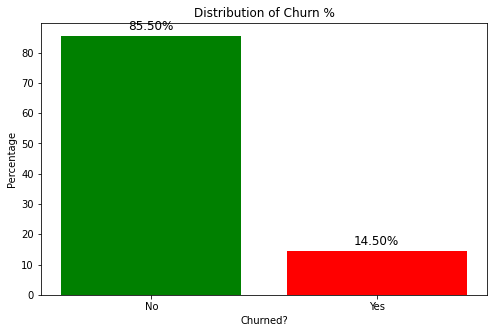

In [9]:
fig, axes = plt.subplots(figsize=(8,5))
data = df["Churn"].value_counts(normalize=True) * 100
axes.bar(["No", "Yes"], data, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Churned?')

for i, v in enumerate(data):
    axes.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()

Observations:
- In the dataset provided, 14.5% customers churned, while the rest remained with the service provider.
- In order to make analysis easier in this section, I will add a new column with numerical value of "Churn" right now. Let's call the column as ChurnVal, such that - True = 1 and False = 0.

In [10]:
# Create column ChurnVal with - True = 1 and False = 0
churn_mapping = {False: 0, True: 1}
df['ChurnVal'] = df['Churn'].map(churn_mapping)

### ii. Churn distribution on additional plans

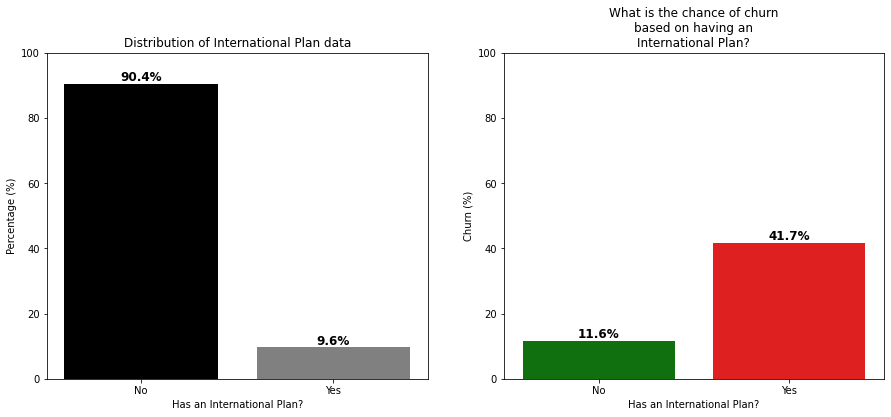

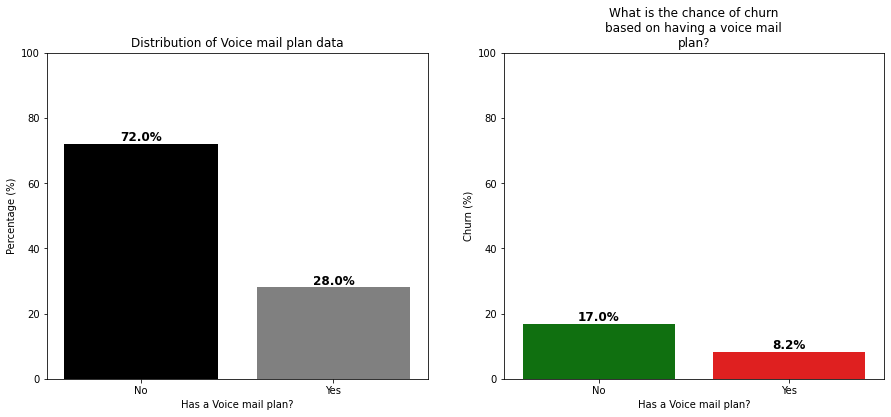

In [11]:
#### International Plan

fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of International Plan
data = df["International plan"].value_counts(normalize=True)
bars = axes1.bar(data.index, data*100, color=['black', 'gray'])
axes1.set_title('Distribution of International Plan data')
axes1.set_xlabel('Has an International Plan?')
axes1.set_ylabel('Percentage (%)')
axes1.set_ylim(0,100)

for bar in bars:
    height = bar.get_height()
    axes1.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Chances of churn based on International Plan
colors = {"No": "green", "Yes": "red"}
bars = sns.barplot(x="International plan", y=df.ChurnVal*100, data=df, ci=None, ax=axes2, palette=colors)
axes2.set_xlabel('Has an International Plan?')
axes2.set_ylabel('Churn (%)')
axes2.set_title("\n".join(textwrap.wrap('What is the chance of churn based on having an International Plan?', 30)))
axes2.set_ylim(0,100)

for bar in axes2.patches:
    height = bar.get_height()
    axes2.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

#### Voice mail Plan

fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of International Plan
data = df["Voice mail plan"].value_counts(normalize=True)
bars = axes1.bar(data.index, data*100, color=['black', 'gray'])
axes1.set_title('Distribution of Voice mail plan data')
axes1.set_xlabel('Has a Voice mail plan?')
axes1.set_ylabel('Percentage (%)')
axes1.set_ylim(0,100)

for bar in bars:
    height = bar.get_height()
    axes1.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Chances of churn based on having a Voice mail plan
colors = {"No": "green", "Yes": "red"}
bars = sns.barplot(x="Voice mail plan", y=df.ChurnVal*100, data=df, ci=None, ax=axes2, palette=colors)
axes2.set_xlabel('Has a Voice mail plan?')
axes2.set_ylabel('Churn (%)')
axes2.set_title("\n".join(textwrap.wrap('What is the chance of churn based on having a voice mail plan?', 30)))
axes2.set_ylim(0,100)

for bar in axes2.patches:
    height = bar.get_height()
    axes2.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

Observations:
- The dataset shows that more than 90% of customers do not have an international plan. However, customers with an international plan exhibit a significantly higher churn rate (42% vs. 12%), suggesting that having an international plan is correlated with a higher likelihood of churn.
- Regarding the voice mail plan, 72% of customers do not have one. Interestingly, the churn rate is higher among those without a voice mail plan (17%) compared to those with one (8%).

### iii. Churn distribution by state

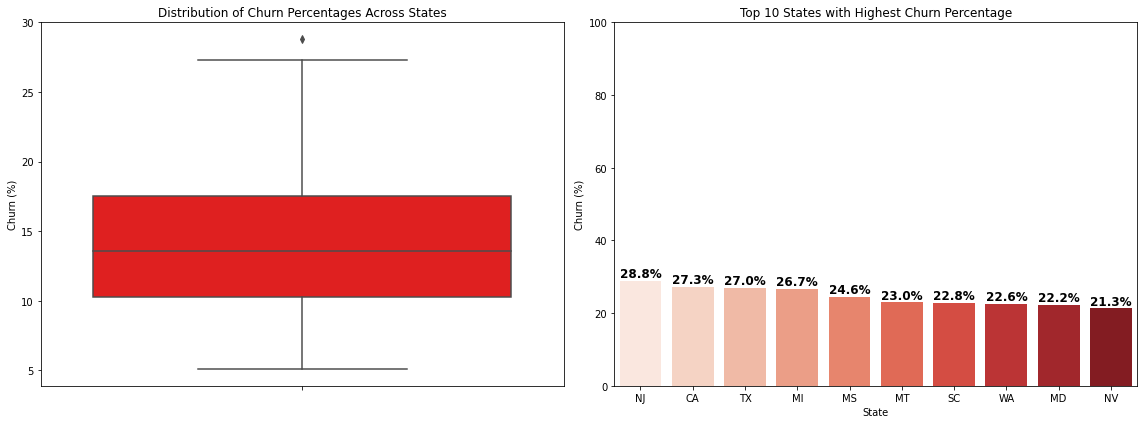

In [12]:
state_churn = df.groupby("State")["ChurnVal"].mean() * 100

top_10_states = state_churn.nlargest(10)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=state_churn, ax=ax1, color="red")
ax1.set_ylabel('Churn (%)')
ax1.set_title('Distribution of Churn Percentages Across States')

sns.barplot(x=top_10_states.index, y=top_10_states.values, ax=ax2, palette="Reds")
ax2.set_xlabel('State')
ax2.set_ylabel('Churn (%)')
ax2.set_ylim(0, 100)
ax2.set_title('Top 10 States with Highest Churn Percentage')

for bar in ax2.patches:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{bar.get_height():.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Observations:
- The boxplot of churn rates across all states reveals that most states have churn rates between ~10% and ~18%, with a few outliers. This indicates that while churn is relatively consistent across states, some states experience significantly higher churn, which may require further investigation into local market conditions.
- The top 10 states with the highest churn rates show a noticeable variation, with the highest (NJ at 28.8%) being significantly above the median churn rate across all states. This suggests that certain states may have specific factors contributing to higher churn, such as regional service quality, competition, or customer demographics.

### iv. Churn distribution by account length

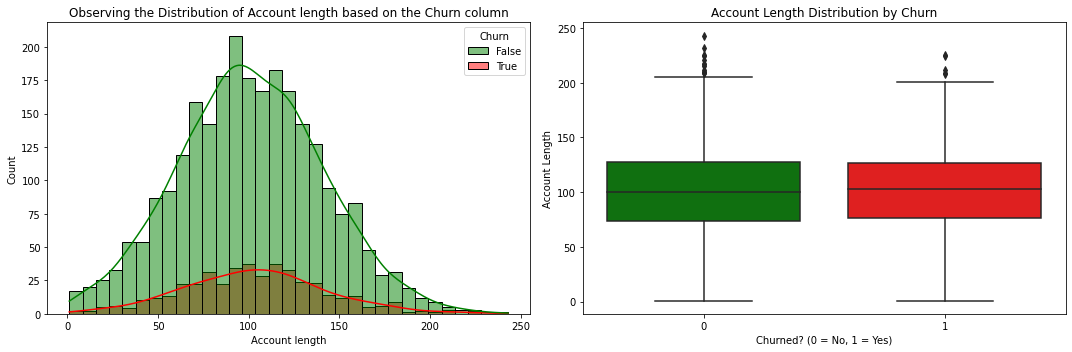

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

churn_palette = {False: "green", True: "red"}

# Plot Account Length Distribution
sns.histplot(data=df, x='Account length', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Account length based on the Churn column')

# Plot relation between Account Length and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Account length"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Account Length')
axes[1].set_title('Account Length Distribution by Churn')

plt.tight_layout()
plt.show()

Observations:
- The distribution of account length appears to be fairly normal, with most customers having an account length between 50 and 150 days. There are few customers with very short or very long account durations.
- The boxplot comparing churn vs. non-churn shows that account length does not have a significant impact on churn, as both churned and non-churned customers have a similar median and interquartile range. However, there are some outliers with very high account lengths, which may warrant further investigation.

### v. Churn distribution considering customer service calls

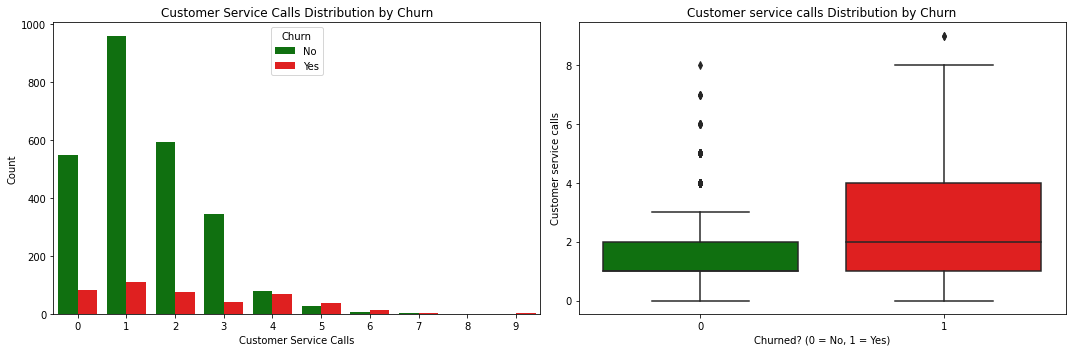

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Customer service calls Distribution
sns.countplot(x=df["Customer service calls"], hue=df["ChurnVal"], palette=["green", "red"], ax=axes[0])
axes[0].set_xlabel("Customer Service Calls")
axes[0].set_ylabel("Count")
axes[0].set_title("Customer Service Calls Distribution by Churn")
axes[0].legend(title="Churn", labels=["No", "Yes"])

# Plot relation between Customer service calls and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Customer service calls"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Customer service calls')
axes[1].set_title('Customer service calls Distribution by Churn')

plt.tight_layout()
plt.show()

Observations:
- Customers who churn tend to contact customer service more frequently. The boxplot shows that the median number of customer service calls is higher for churned customers, with a wider spread and more extreme values compared to non-churned customers.
- The count plot reveals that churners are more concentrated among customers who made multiple service calls. While most customers (churned and non-churned) make 0 to 2 calls, the proportion of churners increases significantly for those making 3 or more calls, suggesting that frequent customer service interactions may be linked to dissatisfaction leading to churn.

### vi. Churn distribution considering usage and charge rates

Day Charge


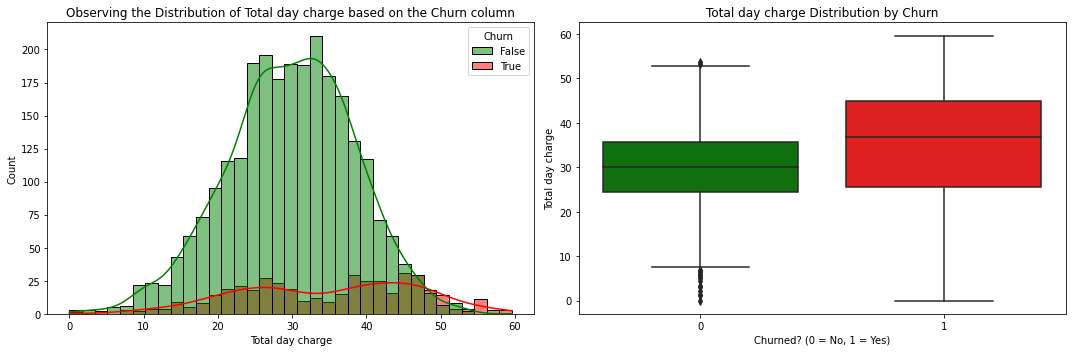

Eve Charge


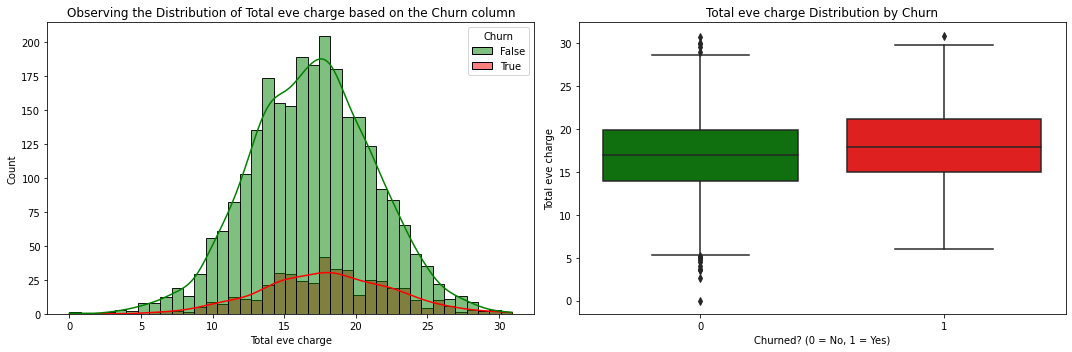

Night Charge


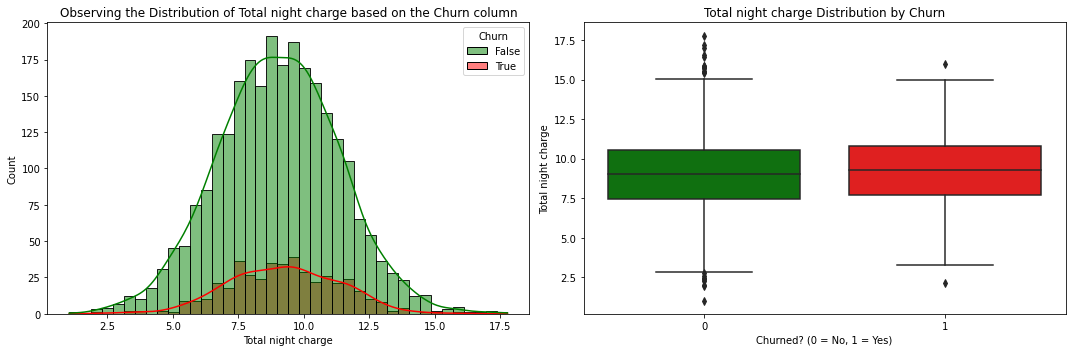

International Charge


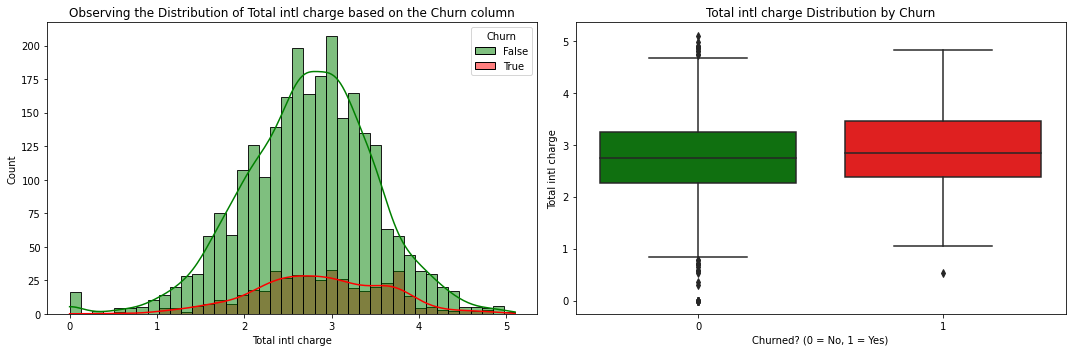

In [15]:
churn_palette = {False: "green", True: "red"}

print("Day Charge")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total day charge Distribution
sns.histplot(data=df, x='Total day charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total day charge based on the Churn column')

# Plot relation between Total day charge and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Total day charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total day charge')
axes[1].set_title('Total day charge Distribution by Churn')

plt.tight_layout()
plt.show()

print("Eve Charge")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total eve charge Distribution
sns.histplot(data=df, x='Total eve charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total eve charge based on the Churn column')

# Plot relation between Total eve charge and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Total eve charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total eve charge')
axes[1].set_title('Total eve charge Distribution by Churn')

plt.tight_layout()
plt.show()

print("Night Charge")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total night charge Distribution
sns.histplot(data=df, x='Total night charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total night charge based on the Churn column')

# Plot relation between Total night charge and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Total night charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total night charge')
axes[1].set_title('Total night charge Distribution by Churn')

plt.tight_layout()
plt.show()

print("International Charge")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total intl charge Distribution
sns.histplot(data=df, x='Total intl charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total intl charge based on the Churn column')

# Plot relation between Total intl charge and Churn using a Boxplot
sns.boxplot(x=df["ChurnVal"], y=df["Total intl charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total intl charge')
axes[1].set_title('Total intl charge Distribution by Churn')

plt.tight_layout()
plt.show()

df_intl_yes = df[df["International plan"] == "Yes"]
df_intl_no = df[df["International plan"] == "No"]


Observations:
- The distribution of total day charges is right-skewed, with most customers having moderate charges. However, churned customers (red) are more present in the higher charge range, indicating that high day charges may contribute to churn.
- Evening and night charge distributions are more balanced, with churned and non-churned customers following similar patterns. There is no strong indication that evening or night charges alone are major churn drivers.
- The churn distribution remains proportional at lower charge levels, but as charges increase, the proportion of churned customers becomes more noticeable, especially for total day charges.
- For international charges, churned customers tend to have slightly higher values on average, as seen in the boxplot where the red distribution is shifted upward. However, the difference is less pronounced compared to day charges.

International Charge (Customers with Intl Plan)


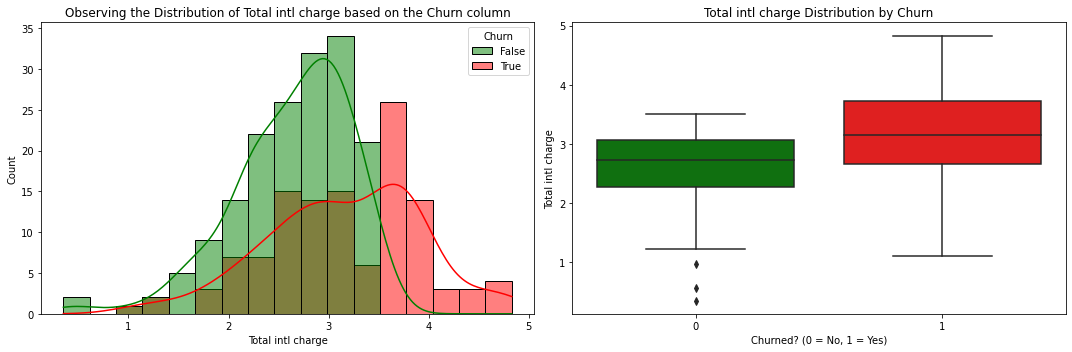

International Charge (Customers without Intl Plan)


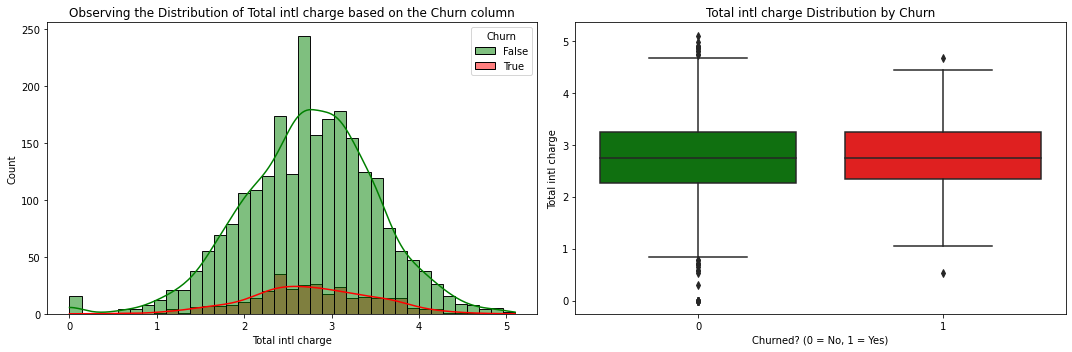

In [16]:
print("International Charge (Customers with Intl Plan)")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total intl charge Distribution
sns.histplot(data=df_intl_yes, x='Total intl charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total intl charge based on the Churn column')

# Plot relation between Total intl charge and Churn using a Boxplot
sns.boxplot(x=df_intl_yes["ChurnVal"], y=df["Total intl charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total intl charge')
axes[1].set_title('Total intl charge Distribution by Churn')

plt.tight_layout()
plt.show()

print("International Charge (Customers without Intl Plan)")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Total intl charge Distribution
sns.histplot(data=df_intl_no, x='Total intl charge', hue='Churn', kde=True, palette=churn_palette, ax=axes[0])
axes[0].set_title('Observing the Distribution of Total intl charge based on the Churn column')

# Plot relation between Total intl charge and Churn using a Boxplot
sns.boxplot(x=df_intl_no["ChurnVal"], y=df["Total intl charge"], ax=axes[1], palette=["green", "red"])
axes[1].set_xlabel('Churned? (0 = No, 1 = Yes)')
axes[1].set_ylabel('Total intl charge')
axes[1].set_title('Total intl charge Distribution by Churn')

plt.tight_layout()
plt.show()

Observations:
- Customers with an International Plan tend to have higher international charges overall probably because of its higher usage, but churned customers (red) show an even stronger presence in the upper charge range. This suggests that higher international usage might be linked to dissatisfaction, potentially due to pricing or billing concerns.
- For customers without an International Plan, churned and non-churned distributions are more similar, indicating that international charges alone are not a major churn factor for this group. 

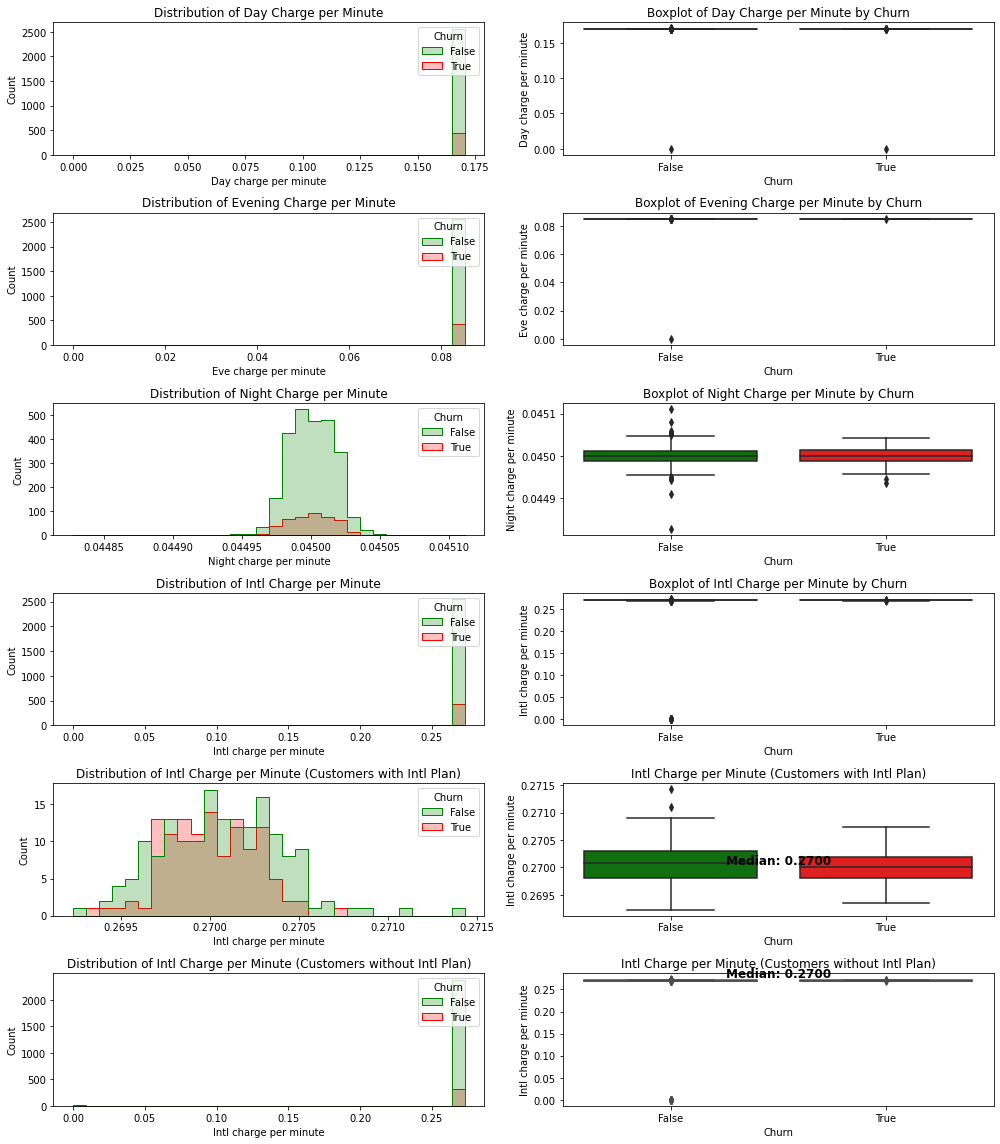

In [17]:
# Calculate charge per minute (handling division by zero)
df["Day charge per minute"] = df["Total day charge"] / df["Total day minutes"].replace(0, 1)
df["Eve charge per minute"] = df["Total eve charge"] / df["Total eve minutes"].replace(0, 1)
df["Night charge per minute"] = df["Total night charge"] / df["Total night minutes"].replace(0, 1)
df["Intl charge per minute"] = df["Total intl charge"] / df["Total intl minutes"].replace(0, 1)

charge_columns = ["Day charge per minute", "Eve charge per minute", "Night charge per minute", "Intl charge per minute"]
titles = ["Day", "Evening", "Night", "Intl"]

df_intl_yes = df[df["International plan"] == "Yes"]
df_intl_no = df[df["International plan"] == "No"]

# Set up subplots (adding two more rows for international plan filtering)
fig, axes = plt.subplots(len(charge_columns) + 2, 2, figsize=(14, 16))

churn_palette = {False: "green", True: "red"}

for i, col in enumerate(charge_columns):
    # Optimized Histogram
    sns.histplot(data=df, x=col, hue="Churn", bins=30, kde=False, element="step", palette=churn_palette, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {titles[i]} Charge per Minute")

    # Boxplot (downsample if dataset is too large)
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)  # Downsample if needed
    sns.boxplot(x=sample_df["Churn"], y=sample_df[col], palette=churn_palette, ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot of {titles[i]} Charge per Minute by Churn")

# Histogram & Boxplot for Intl Charge per Minute (With Plan)
sns.histplot(data=df_intl_yes, x="Intl charge per minute", hue="Churn", bins=30, kde=False, element="step", palette=churn_palette, ax=axes[-2, 0])
axes[-2, 0].set_title("Distribution of Intl Charge per Minute (Customers with Intl Plan)")
sns.boxplot(x=df_intl_yes["Churn"], y=df_intl_yes["Intl charge per minute"], palette={0: "green", 1: "red"}, ax=axes[-2, 1])
axes[-2, 1].set_title("Intl Charge per Minute (Customers with Intl Plan)")
median_with_plan = df_intl_yes["Intl charge per minute"].median()
axes[-2, 1].text(0.5, median_with_plan, f"Median: {median_with_plan:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

# Histogram & Boxplot for Intl Charge per Minute (Without Plan)
sns.histplot(data=df_intl_no, x="Intl charge per minute", hue="Churn", bins=30, kde=False, element="step", palette=churn_palette, ax=axes[-1, 0])
axes[-1, 0].set_title("Distribution of Intl Charge per Minute (Customers without Intl Plan)")
sns.boxplot(x=df_intl_no["Churn"], y=df_intl_no["Intl charge per minute"], palette={0: "blue", 1: "orange"}, ax=axes[-1, 1])
axes[-1, 1].set_title("Intl Charge per Minute (Customers without Intl Plan)")
median_without_plan = df_intl_no["Intl charge per minute"].median()
axes[-1, 1].text(0.5, median_without_plan, f"Median: {median_without_plan:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

plt.tight_layout()
plt.show()



Observations:
- Day, Evening, and International charge per minute have very little variation, as all values are concentrated in a narrow range. This suggests that these charges are likely fixed rates across all customers, making them less useful in explaining churn behavior.
- Night charge per minute shows minor variation, but the distributions for churned and non-churned customers are nearly identical, indicating that charge per minute is not a strong differentiator for churn in any time period.
- Customers with and without an International Plan are paying nearly the same median charge per minute (~0.27). This suggests that the International Plan may not be providing significant cost savings, which could lead to dissatisfaction and higher churn among users who expected better rates.

#### vii. Correlations

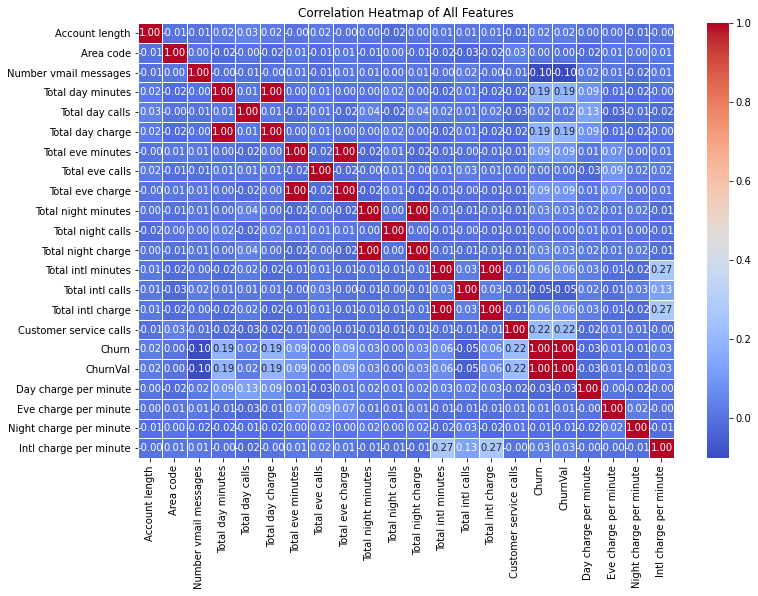

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of All Features")

plt.show()


Observations:
- Total minutes and total charges are highly correlated, as expected. The diagonal red blocks indicate that day, evening, night, and international minutes are almost perfectly correlated with their respective charges, confirming that charges are directly proportional to usage.
- Churn has the strongest positive correlation with customer service calls (~0.22), suggesting that customers who contact customer support more frequently are more likely to churn. This aligns with the previous findings that high customer service interactions may indicate dissatisfaction.
- There is no strong correlation between churn and total minutes/charges, meaning that high usage alone does not necessarily predict churn. Other factors, such as customer service interactions or specific plan features, may play a bigger role in determining churn behavior.

## Section 3: Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import pickle
from sklearn.preprocessing import PolynomialFeatures

In [20]:
df_ini = df

In [42]:
df = df_ini

### i. Feature engineering

In [43]:
X = X = df.drop(columns=['Churn','ChurnVal', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes','Day charge per minute','Eve charge per minute', 'Eve charge per minute', 'Night charge per minute', 'Intl charge per minute'], axis=1) 
y = df["ChurnVal"]

# Identify categorical and numerical columns
categorical_features = ["State", "International plan", "Voice mail plan", "Area code"]
numerical_features = [col for col in X.columns if col not in categorical_features]

def feature_engineering(X):
    
    X = pd.DataFrame(X, columns=numerical_features + categorical_features)
     
    # Exclude non relevant and multicollinear features
    non_rel_cols = ['Churn','ChurnVal', 'Day charge per minute','Eve charge per minute', 'Eve charge per minute', 'Night charge per minute', 'Intl charge per minute']  # Features
    multicollinear_cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
    
    exclude = non_rel_cols + multicollinear_cols
    
    X = X.drop(columns=exclude, errors="ignore")
    
    return X

# Apply FunctionTransformer to apply the feature engineering function
feature_transformer = FunctionTransformer(feature_engineering)

# Preprocessing pipeline
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


### iii. Define classification models

In [44]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=50)

### ii. Split the dataset for cross-validation

In [45]:
from sklearn.model_selection import RandomizedSearchCV

models = {
    "Logistic Regression": (LogisticRegression(solver="saga", max_iter=500, class_weight="balanced"),
                           {"clf__C": [0.01, 0.1, 1, 10, 100], "clf__penalty": ['l1', 'l2']}),

    "Random Forest": (RandomForestClassifier(class_weight='balanced'),
                      {"clf__n_estimators": [50, 100, 150, 200], "clf__max_depth": [5, 10, None], "clf__min_samples_split": [2, 5, 10]}),

    "Gradient Boosting": (GradientBoostingClassifier(),
                          {"clf__n_estimators": [50, 100, 150, 200], "clf__learning_rate": [0.01, 0.1, 0.2], "clf__max_depth": [3, 6, 9]}),

    "SVM": (SVC(probability=True),
            {"clf__C": [0.1, 1, 10], "clf__kernel": ['linear', 'rbf']}),

    "K-Nearest Neighbors": (KNeighborsClassifier(),
                            {"clf__n_neighbors": [3, 5, 7], "clf__weights": ['uniform', 'distance']}),

    "XGBoost": (xgb.XGBClassifier(eval_metric="logloss"),
                {"clf__n_estimators": [50, 100, 150, 200], "clf__learning_rate": [0.01, 0.1, 0.2], "clf__max_depth": [3, 6, 9]})

}


### iv. Train and tune models

In [46]:
# Train and evaluate models
results = []
best_models = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    
    pipeline = Pipeline([
        ("feature_engineering", feature_transformer),
        ("preprocessor", preprocessor),
        ("clf", model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best model from GridSearch
    best_model = grid_search.best_estimator_

    # Predict on validation data
    y_pred = best_model.predict(X_cv)
    y_pred_proba = best_model.predict_proba(X_cv)[:, 1]

    # Evaluate Performance
    acc = accuracy_score(y_cv, y_pred)
    f1 = f1_score(y_cv, y_pred)
    auc = roc_auc_score(y_cv, y_pred_proba)

    # Store results
    results.append({"Model": model_name, "Accuracy": acc, "F1-Score": f1, "AUC-ROC": auc, 
                    "Best Params": grid_search.best_params_})
    
    best_models[model_name] = best_model
    

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM...
Training K-Nearest Neighbors...
Training XGBoost...


### v. Compare results

In [47]:
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(df_results)

,Model,Accuracy,F1-Score,AUC-ROC,Best Params
5,XGBoost,0.956667,0.819444,0.895668,"{'clf__learning_rate': 0.1, 'clf__max_depth': ..."
2,Gradient Boosting,0.950000,0.794521,0.904730,"{'clf__learning_rate': 0.1, 'clf__max_depth': ..."
1,Random Forest,0.928333,0.711409,0.906744,"{'clf__max_depth': None, 'clf__min_samples_spl..."
3,SVM,0.910000,0.630137,0.876928,"{'clf__C': 10, 'clf__kernel': 'rbf'}"
4,K-Nearest Neighbors,0.895000,0.411215,0.802400,"{'clf__n_neighbors': 5, 'clf__weights': 'unifo..."
0,Logistic Regression,0.781667,0.469636,0.816681,"{'clf__C': 1, 'clf__penalty': 'l2'}"


Observations:
- XGBoost is the top-performing model, with an AUC-ROC of 0.90 and Accuracy of 0.96, achieving the highest F1-Score (0.82). This suggests that XGBoost is very effective in handling churn prediction and outperforms other models in terms of both classification and generalization.
- Gradient Boosting comes in second, with an AUC-ROC of 0.91 and Accuracy of 0.95, achieving a strong F1-Score of 0.80. While it performs very well, it is slightly behind XGBoost in terms of accuracy and AUC-ROC, making it a competitive alternative.
- Random Forest achieved an AUC-ROC of 0.91 and an Accuracy of 0.93, with a F1-Score of 0.71. Random Forest remains effective in both distinguishing churned and non-churned customers, but its F1-Score indicates that it could benefit from further tuning.
- SVM performed with an Accuracy of 0.91, and an AUC-ROC of 0.88. However, the F1-Score of 0.63 is noticeably lower. Despite the strong AUC-ROC, the lower F1-Score suggests the model may struggle to correctly classify all churned cases, which is crucial for business objectives.
- K-Nearest Neighbors (KNN) shows weaker performance, with an AUC-ROC of 0.80 and an Accuracy of 0.90. Its F1-Score is 0.41, indicating significant difficulty in handling churn prediction. Given its reliance on local density, it may not generalize well to the business case of churn prediction.
- Logistic Regression performed the weakest, with an AUC-ROC of 0.82 and Accuracy of 0.78. Its F1-Score of 0.47 shows it is insufficient for capturing the complexities of churn prediction, especially in cases with class imbalance.

### vi. Save best performing model

In [48]:
xgb_model = best_models["XGBoost"]

with open("67627_Model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

with open("67627_Preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

print(f"Best model saved: XGBoost")

Best model saved: XGBoost


## Section 4: Validate on test dataset

In [58]:
# Validate on test dataset
with open("67627_Model.pkl", "rb") as file:
    xgb_model = pickle.load(file)

with open("67627_Preprocessor.pkl", "rb") as file:
    preprocessor = pickle.load(file)

x_test = pd.read_csv("trainingsdatensatz.csv")

x_test["Churn_Prediction"] = xgb_model.predict(x_test)

x_test.to_csv("test_data_with_predictions.csv", index=False)
print("Predictions saved!")

# Display output
display(x_test.head())

Predictions saved!


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_Prediction
0,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,0
1,MI,65,415,No,No,0,211.3,120,35.92,162.6,...,13.82,134.7,118,6.06,13.2,5,3.56,3,False,0
2,MI,36,510,No,Yes,29,281.4,102,47.84,202.2,...,17.19,187.2,113,8.42,9.0,6,2.43,2,False,0
3,MT,143,415,No,No,0,172.3,97,29.29,174.0,...,14.79,188.2,119,8.47,13.0,4,3.51,2,False,0
4,OK,89,510,No,No,0,303.9,95,51.66,260.9,...,22.18,312.1,89,14.04,5.3,3,1.43,1,True,1


## Section 5: Verify feature importance

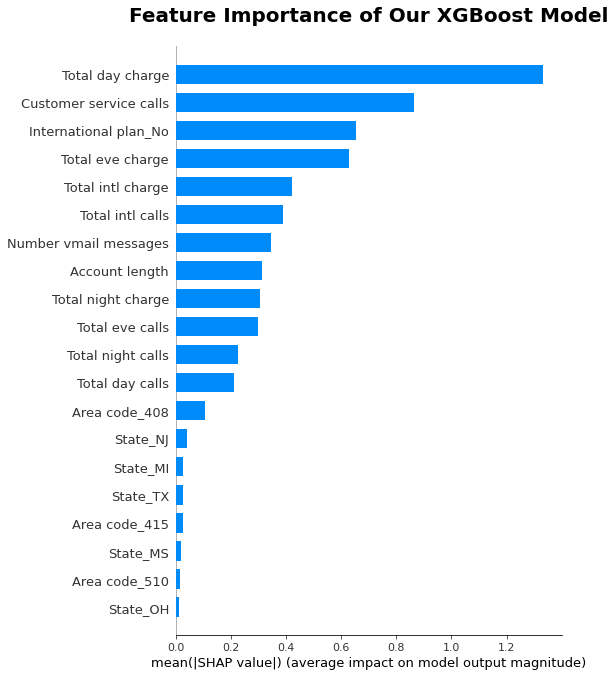

In [50]:
import shap
import matplotlib.pyplot as plt

# Get the XGBoost model inside the pipeline
xgb_model = best_model.named_steps['clf']  # Access the XGBoost model from the pipeline

# Fix the SHAP bug with XGBoost booster
mybooster = xgb_model.get_booster()
model_bytearray = mybooster.save_raw()[4:]

def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

# Get the transformed training data (after preprocessing, one-hot encoding, etc.)
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Get the feature names after OneHotEncoding
encoder = best_model.named_steps['preprocessor'].transformers_[1][1]  # Get OneHotEncoder from the pipeline
feature_names = encoder.get_feature_names_out()  # Get names of transformed features

# Combine numerical and categorical feature names
all_feature_names = numerical_features + list(feature_names)

# Get SHAP values
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X_train_transformed)

# Plot feature importance using SHAP
plt.figure(figsize=(10, 6))
plt.title('Feature Importance of Our XGBoost Model', pad=25, fontsize=20, fontweight='bold')
shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names, plot_type="bar")
plt.show()
